# Polynomial Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Importing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path ke file CSV
file_path = '/content/drive/MyDrive/Machine Learning/Dataset/Position_Salaries.csv'

# Membaca file CSV
dataset = pd.read_csv(file_path)

In [ ]:
X = dataset.iloc[:, 1:2].values  # Kolom 'Level'
y = dataset.iloc[:, 2].values    # Kolom 'Salary'

# Kolom ke-2 (index 1) diambil sebagai 'X' dan kolom ke-3 (index 2) sebagai 'y'.
# X memiliki dimensi (Level), sedangkan y berisi data Gaji.

## Training the Linear Regression model on the whole dataset

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [ ]:
poly_reg = PolynomialFeatures(degree=4)  # - PolynomialFeatures digunakan untuk mengubah X menjadi bentuk polinomial dengan derajat tertentu (misal: derajat 4).
X_poly = poly_reg.fit_transform(X) # - Transformasi ini menciptakan fitur tambahan (1, X, X^2, X^3, dll.).

# - Model linier kemudian dilatih dengan X_poly dan y untuk mendapatkan regresi polinomial.
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Visualising the Linear Regression results

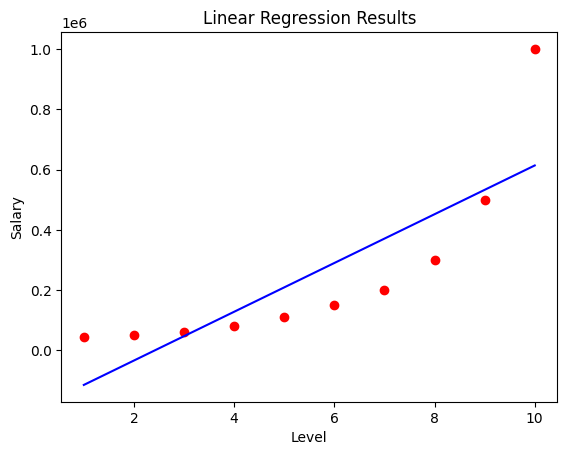

In [ ]:
plt.scatter(X, y, color = 'red')  # Memvisualisasikan data asli
plt.plot(X, lin_reg.predict(X), color = 'blue')  # Memvisualisasikan hasil regresi linier
plt.title('Linear Regression Results')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

# Penjelasan: Memvisualisasikan hasil model regresi linier.
# Scatter plot menampilkan data asli dalam warna merah.
# Line plot menunjukkan prediksi model linier dalam warna biru.

## Visualising the Polynomial Regression results

<ipython-input-13-eed8e9b614c8>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)  # Membuat lebih banyak titik data untuk kurva lebih mulus


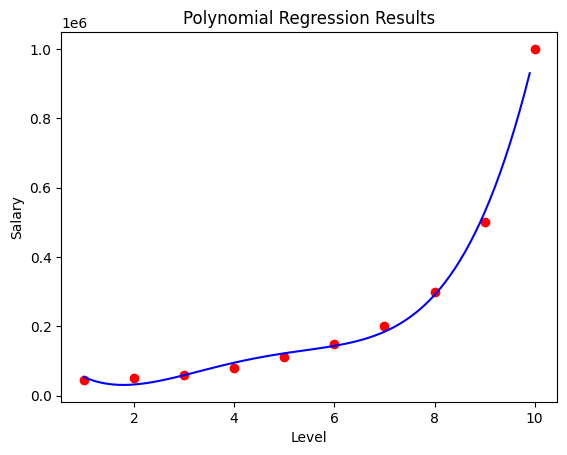

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)  # Membuat lebih banyak titik data untuk kurva lebih mulus
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')  # Memvisualisasikan data asli
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')  # Memvisualisasikan hasil regresi polinomial
plt.title('Polynomial Regression Results')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

# Penjelasan: Memvisualisasikan hasil model regresi polinomial.
# X_grid digunakan untuk mendapatkan lebih banyak titik (dengan interval 0.1) agar kurva polinomial lebih halus.
# Scatter plot dan plot linier digunakan untuk menampilkan data asli dan prediksi model.

## Predicting a new result with Linear Regression

In [ ]:
lin_reg_prediction = lin_reg.predict([[6.5]])  # Prediksi untuk level 6.5 dengan regresi linier
print(f'Prediksi gaji dengan Linear Regression untuk Level 6.5: {lin_reg_prediction[0]}')

# Penjelasan: Menggunakan model linier untuk memprediksi gaji pada level 6.5.
# predict() digunakan untuk menghasilkan nilai prediksi.

Prediksi gaji dengan Linear Regression untuk Level 6.5: 330378.78787878784


## Predicting a new result with Polynomial Regression

In [ ]:
poly_reg_prediction = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))  # Prediksi untuk level 6.5 dengan regresi polinomial
print(f'Prediksi gaji dengan Polynomial Regression untuk Level 6.5: {poly_reg_prediction[0]}')

# Penjelasan: Menggunakan model polinomial untuk memprediksi gaji pada level 6.5.
# fit_transform() digunakan untuk mengubah level 6.5 ke bentuk polinomial dan predict() untuk memprediksi hasil.

Prediksi gaji dengan Polynomial Regression untuk Level 6.5: 158862.45265155006


#KESIMPULAN


##Regresi linier cocok digunakan ketika hubungan antara variabel dependen (Salary) dan variabel independen (Level) cenderung linear, sedangkan regresi polinomial lebih baik digunakan ketika hubungan antara variabel tersebut bersifat non-linear. Dalam kasus Position_Salaries.csv, terlihat bahwa data memiliki pola non-linear yang lebih kompleks, sehingga regresi polinomial memberikan hasil yang lebih akurat dan lebih sesuai dibandingkan dengan regresi linier. Jadi Polynomial Regression lebih akurat dalam memberikan hasil.